In [3]:
import os

import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import tqdm


In [9]:
df = pd.read_csv('./data/full_df.csv')
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [10]:
df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
labels = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

label_sum = df[labels[0]].copy()
for l in labels[1:]:
    label_sum += df[l]
    
label_sum.describe()

count    6392.000000
mean        1.163798
std         0.389083
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: N, dtype: float64

In [12]:
multi_label = (label_sum > 1)
multi_label.sum()

1001

In [13]:
target_sum = df['target'].apply(lambda x: sum(list(map(int, x[1:-1].split(',')))))
target_sum.describe

<bound method NDFrame.describe of 0       1
1       1
2       1
3       1
4       1
       ..
6387    1
6388    1
6389    1
6390    1
6391    1
Name: target, Length: 6392, dtype: int64>

In [27]:
IMAGE_PATH = './data/preprocessed_images/'

missing = []
for i, idx in enumerate(df.index):
    dd = df.iloc[idx]
    
    image_name = dd['Left-Fundus']
    image_path = os.path.join(IMAGE_PATH, image_name)
    try:
        _ = Image.open(image_path)
    except FileNotFoundError:
        missing.append(idx)
        continue
        
    image_name = dd['Right-Fundus']
    image_path = os.path.join(IMAGE_PATH, image_name)
    try:
        _ = Image.open(image_path)
    except FileNotFoundError:
        missing.append(idx)
        continue

print(len(missing), missing)

324 [2, 31, 41, 54, 60, 63, 73, 74, 90, 95, 119, 155, 160, 164, 167, 171, 176, 189, 191, 203, 208, 225, 239, 243, 246, 255, 267, 292, 298, 316, 329, 343, 352, 362, 365, 366, 374, 383, 385, 387, 409, 415, 422, 429, 432, 440, 450, 452, 462, 478, 517, 518, 534, 545, 588, 613, 626, 653, 667, 692, 711, 726, 727, 728, 729, 781, 784, 810, 824, 851, 853, 858, 865, 868, 877, 896, 897, 899, 905, 931, 936, 941, 943, 948, 951, 954, 974, 1013, 1014, 1022, 1030, 1040, 1068, 1072, 1107, 1149, 1196, 1215, 1221, 1226, 1227, 1232, 1235, 1242, 1243, 1257, 1269, 1272, 1273, 1274, 1276, 1280, 1282, 1285, 1288, 1289, 1316, 1376, 1411, 1494, 1505, 1509, 1579, 1663, 1664, 1734, 1742, 1750, 1770, 1787, 1830, 1883, 1885, 1895, 1896, 1900, 1991, 2029, 2063, 2091, 2161, 2163, 2170, 2278, 2295, 2349, 2350, 2367, 2423, 2447, 2482, 2547, 2606, 2744, 2854, 2989, 2994, 3004, 3053, 3106, 3196, 3213, 3216, 3227, 3229, 3245, 3249, 3254, 3255, 3271, 3299, 3312, 3320, 3324, 3327, 3328, 3364, 3367, 3400, 3404, 3423, 3443, 3

In [30]:
print(len(df))
df = df.drop(index=missing)
print(len(df))

6392
6068


In [31]:
from torchvision import transforms


def show_images(df, n_rows=3, resize=(224, 244)):
    transform = transforms.Resize(resize)
        
    fig, ax = plt.subplots(n_rows, 2 * n_rows, figsize=(16,16))
    
    for i, idx in enumerate(df.index):
        dd = df.iloc[idx]
        row, col = i // n_rows, 2 * (i % n_rows)
        
        image_name = dd['Left-Fundus']
        image_path = os.path.join(IMAGE_PATH, image_name)
        img_data = transform(Image.open(image_path))
        ax[row, col].imshow(img_data)
        ax[row, col].axis('off')
        
        image_name = dd['Right-Fundus']
        image_path = os.path.join(IMAGE_PATH, image_name)
        img_data = transform(Image.open(image_path))
        ax[row, col+1].imshow(img_data)
        ax[row, col+1].axis('off')
        
    fig.tight_layout()
    fig.show()

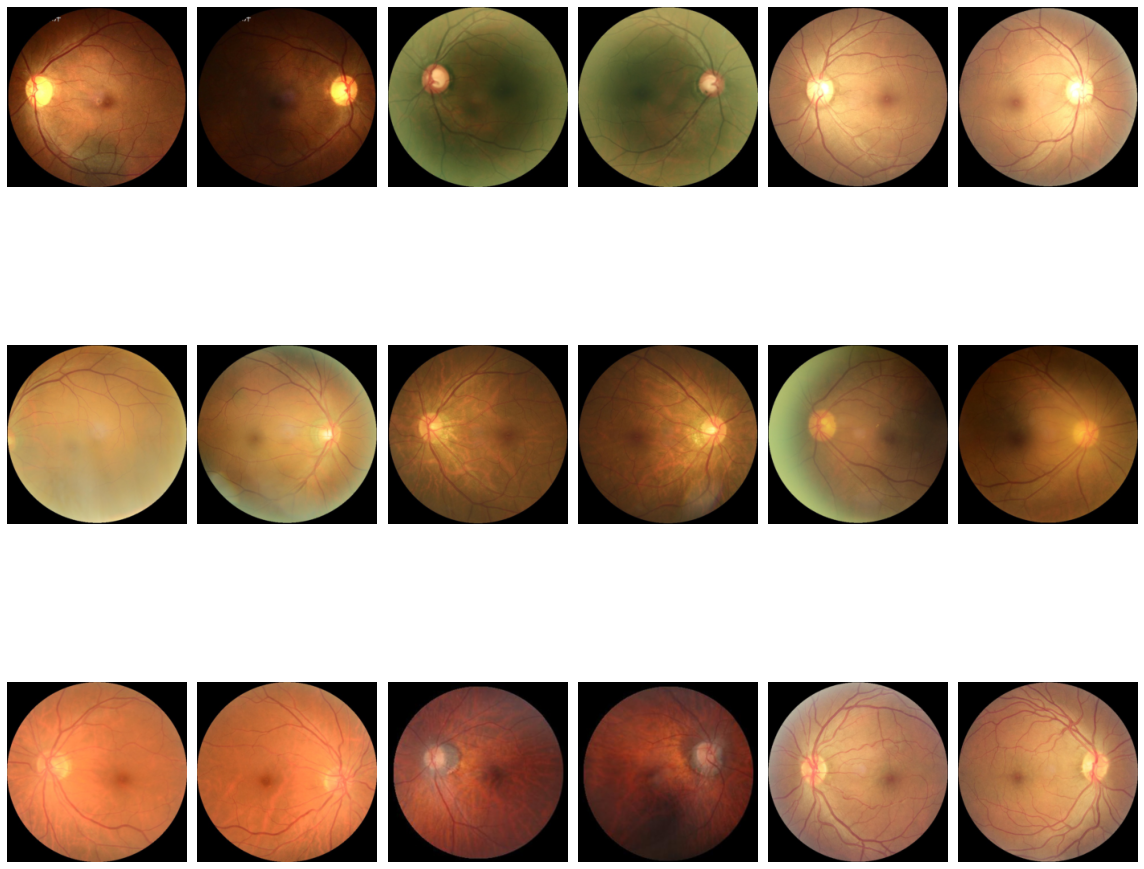

In [37]:
sample_df = df.loc[(df['N']==1)].sample(9).reset_index()
show_images(sample_df, resize=(224, 224))

In [ ]:
df['keywords'] = df['Left-Diagnostic Keywords'] + ' ' + df['Right-Diagnostic Keywords']
keywords = df['keywords'].copy()
keywords

In [ ]:
keywords = keywords.str.replace(r'[^a-zA-Z\s]+', ' ', regex=True)
keywords = keywords.str.replace(r' +', ' ', regex=True)
keywords

In [ ]:
vocab = set()
for kws in keywords:
    for kw in kws.split():
        vocab.add(kw)
        
print(len(vocab))
vocab